In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [3]:
# Read in the generation-levels-detail dataset
generation_shares_detail_df = pd.read_csv("./resources-KA/dfa-generation-shares-detail.csv")
generation_shares_detail_df.head()  


,Date,Category,Assets,Nonfinancial assets,Real estate,Consumer durables,Financial assets,Deposits,Money market fund shares,Debt securities,...,Miscellaneous assets,Liabilities,Loans (Liabilities),Home mortgages,Consumer credit,Depository institutions loans n.e.c.,Other loans and advances (Liabilities),Deferred and unpaid life insurance premiums,Net worth,Household count
0,1989:Q3,Silent,74.8,64.3,66.6,55.9,81.1,82.3,85.4,83.5,...,61.2,40.2,40.1,37.6,39.4,51.9,83.6,60.6,80.2,48553376
1,1989:Q3,BabyBoom,24.6,34.7,32.8,41.7,18.6,17.3,14.4,16.0,...,37.5,58.1,58.2,61.3,56.8,47.9,16.2,38.6,19.5,39289625
2,1989:Q3,GenX,0.6,1.0,0.6,2.4,0.3,0.4,0.1,0.5,...,1.3,1.7,1.7,1.1,3.8,0.2,0.2,0.8,0.4,5177100
3,1989:Q3,Millennial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1989:Q4,Silent,74.5,64.1,66.5,55.5,80.6,81.4,83.5,83.4,...,61.0,40.0,39.9,37.5,39.0,52.4,84.3,60.2,79.8,48581895


In [4]:
generation_shares_detail_df.dtypes

Date                                            object
Category                                        object
Assets                                         float64
Nonfinancial assets                            float64
Real estate                                    float64
Consumer durables                              float64
Financial assets                               float64
Deposits                                       float64
Money market fund shares                       float64
Debt securities                                float64
U.S. government and municipal securities       float64
Corporate and foreign bonds                    float64
Loans (Assets)                                 float64
Other loans and advances (Assets)              float64
Mortgages                                      float64
Corporate equities and mutual fund shares      float64
Life insurance reserves                        float64
Annuities                                      float64
DC pension

In [5]:
# Update dataframe to include Year column based on date, this will be used to sum by year vs quarter
# Convert the 'Date' column to datetime
generation_shares_detail_df['Date'] = pd.to_datetime(generation_shares_detail_df['Date'], format='%Y:Q%m')

# Extract the year and create a new column 'Year'
generation_shares_detail_df['Year'] = generation_shares_detail_df['Date'].dt.year


# Display the DataFrame
generation_shares_detail_df.head()

,Date,Category,Assets,Nonfinancial assets,Real estate,Consumer durables,Financial assets,Deposits,Money market fund shares,Debt securities,...,Liabilities,Loans (Liabilities),Home mortgages,Consumer credit,Depository institutions loans n.e.c.,Other loans and advances (Liabilities),Deferred and unpaid life insurance premiums,Net worth,Household count,Year
0,1989-03-01,Silent,74.8,64.3,66.6,55.9,81.1,82.3,85.4,83.5,...,40.2,40.1,37.6,39.4,51.9,83.6,60.6,80.2,48553376,1989
1,1989-03-01,BabyBoom,24.6,34.7,32.8,41.7,18.6,17.3,14.4,16.0,...,58.1,58.2,61.3,56.8,47.9,16.2,38.6,19.5,39289625,1989
2,1989-03-01,GenX,0.6,1.0,0.6,2.4,0.3,0.4,0.1,0.5,...,1.7,1.7,1.1,3.8,0.2,0.2,0.8,0.4,5177100,1989
3,1989-03-01,Millennial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1989
4,1989-04-01,Silent,74.5,64.1,66.5,55.5,80.6,81.4,83.5,83.4,...,40.0,39.9,37.5,39.0,52.4,84.3,60.2,79.8,48581895,1989


In [6]:

# Group by 'Year' and 'Category' and calculate the mean
gen_level_details_grouped = generation_shares_detail_df.groupby(['Year', 'Category']).mean()

# Reset the index to make 'Year' and 'Category' normal columns again
# gen_level_details_grouped.reset_index(inplace=True)

# Display the DataFrame
gen_level_details_grouped.head()

Date  Assets  Nonfinancial assets  Real estate  \
Year Category                                                                   
1989 BabyBoom   1989-03-16 12:00:00  24.750                34.75       32.800   
     GenX       1989-03-16 12:00:00   0.600                 1.05        0.650   
     Millennial 1989-03-16 12:00:00   0.000                 0.00        0.000   
     Silent     1989-03-16 12:00:00  74.650                64.20       66.550   
1990 BabyBoom   1990-02-15 00:00:00  25.025                35.05       33.175   

                 Consumer durables  Financial assets  Deposits  \
Year Category                                                    
1989 BabyBoom                 41.8             18.85     17.65   
     GenX                      2.5              0.35      0.50   
     Millennial                0.0              0.00      0.00   
     Silent                   55.7             80.85     81.85   
1990 BabyBoom                 41.8             19.10     18.80   

                 Money market fund shares  Debt securities  \
Year Category                                                
1989 BabyBoom                       15.35           16.050   
     GenX                            0.15            0.500   
     Millennial                      0.00            0.000   
     Silent                         84.45           83.450   
1990 BabyBoom                       19.80           16.575   

                 U.S. government and municipal securities  ...  \
Year Category                                              ...   
1989 BabyBoom                                      14.350  ...   
     GenX                                           0.550  ...   
     Millennial                                     0.000  ...   
     Silent                                        85.100  ...   
1990 BabyBoom                                      15.275  ...   

                 Miscellaneous assets  Liabilities  Loans (Liabilities)  \
Year Category                                                             
1989 BabyBoom                  37.550        58.10               58.200   
     GenX                       1.400         1.80                1.800   
     Millennial                 0.000         0.00                0.000   
     Silent                    61.100        40.10               40.000   
1990 BabyBoom                  37.925        58.05               58.125   

                 Home mortgages  Consumer credit  \
Year Category                                      
1989 BabyBoom            61.350           56.800   
     GenX                 1.100            4.000   
     Millennial           0.000            0.000   
     Silent              37.550           39.200   
1990 BabyBoom            61.125           56.625   

                 Depository institutions loans n.e.c.  \
Year Category                                           
1989 BabyBoom                                   47.65   
     GenX                                        0.20   
     Millennial                                  0.00   
     Silent                                     52.15   
1990 BabyBoom                                   46.15   

                 Other loans and advances (Liabilities)  \
Year Category                                             
1989 BabyBoom                                     15.85   
     GenX                                          0.20   
     Millennial                                    0.00   
     Silent                                       83.95   
1990 BabyBoom                                     16.00   

                 Deferred and unpaid life insurance premiums  Net worth  \
Year Category                                                             
1989 BabyBoom                                           38.6     19.600   
     GenX                                                1.0      0.400   
     Millennial                                          0.0      0.000   
     Silent           

In [7]:
# Filter the DataFrame down only to those columns to chart
gen_level_details_grouped = gen_level_details_grouped[["Net worth", "Assets", "Liabilities", "Real estate"]]   
# gen_level_details_grouped = gen_level_details_grouped[['Net worth', 'Assets', 'Liabilities', 'Real estate']]
gen_level_details_grouped.head(50)
# gen_level_details_grouped.loc[1990]




Net worth  Assets  Liabilities  Real estate
Year Category                                               
1989 BabyBoom       19.600  24.750       58.100       32.800
     GenX            0.400   0.600        1.800        0.650
     Millennial      0.000   0.000        0.000        0.000
     Silent         80.000  74.650       40.100       66.550
1990 BabyBoom       19.725  25.025       58.050       33.175
     GenX            0.525   0.775        2.425        0.850
     Millennial      0.000   0.000        0.000        0.000
     Silent         79.725  74.175       39.525       66.000
1991 BabyBoom       20.825  26.000       58.275       34.025
     GenX            0.825   1.175        3.250        1.250
     Millennial      0.000   0.000        0.000        0.000
     Silent         78.350  72.850       38.475       64.750
1992 BabyBoom       22.250  27.100       57.300       35.200
     GenX            1.000   1.500        4.700        1.775
     Millennial      0.000   0.000        0.000        0.000
     Silent         76.775  71.400       38.025       63.075
1993 BabyBoom       24.550  29.150       57.900       36.925
     GenX            1.275   2.000        6.450        2.250
     Millennial      0.000   0.000        0.000        0.000
     Silent         74.125  68.850       35.625       60.825
1994 BabyBoom       26.000  30.600       58.625       38.700
     GenX            1.375   2.400        8.575        2.800
     Millennial      0.000   0.000        0.000        0.000
     Silent         72.600  67.025       32.775       58.500
1995 BabyBoom       28.200  32.600       58.850       40.975
     GenX            1.875   3.125       10.825        4.200
     Millennial      0.000   0.000        0.000        0.000
     Silent         69.925  64.275       30.300       54.850
1996 BabyBoom       30.100  34.150       58.425       41.675
     GenX            2.250   3.725       12.625        4.925
     Millennial      0.000   0.000        0.000        0.000
     Silent         67.650  62.125       28.975       53.400
1997 BabyBoom       31.950  35.525       57.400       41.850
     GenX            3.025   4.600       14.300        5.825
     Millennial      0.000   0.000        0.000        0.000
     Silent         65.050  59.875       28.300       52.300
1998 BabyBoom       34.225  37.275       56.275       42.575
     GenX            3.850   5.550       16.200        7.100
     Millennial      0.000   0.000        0.000        0.000
     Silent         61.900  57.200       27.525       50.325
1999 BabyBoom       36.675  39.425       56.600       43.400
     GenX            4.900   6.700       18.050        8.750
     Millennial      0.000   0.000        0.000        0.000
     Silent         58.425  53.875       25.350       47.875
2000 BabyBoom       39.300  41.650       56.200       44.525
     GenX            5.700   7.750       20.450       10.150
     Millennial      0.000   0.000        0.000        0.000
     Silent         54.950  50.600       23.300       45.300
2001 BabyBoom       41.075  43.275       56.050       45.875
     GenX            5.425   7.950       22.650       11.175

In [8]:
# Python
selected_rows = gen_level_details_grouped.loc[[(1999, 'BabyBoom'), (2007, 'GenX'), (2023, 'Millennial')]]
selected_rows


,,Net worth,Assets,Liabilities,Real estate
Year,Category,,,,
1999,BabyBoom,36.675,39.425,56.600,43.400
2007,GenX,9.300,13.650,35.025,20.750
2023,Millennial,8.975,12.150,36.075,17.675


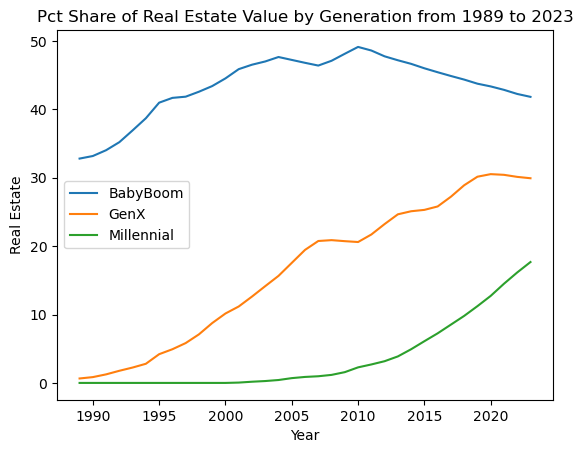

In [9]:
# Create line chart of Pct of real estate by generation from 1989 to 2023

# Filter the data to include only the years from 1989 to 2023
filtered_data = gen_level_details_grouped.loc[(gen_level_details_grouped.index.get_level_values('Year') >= 1989) & 
                                              (gen_level_details_grouped.index.get_level_values('Year') <= 2023)]

# Filter the data to include only the 'Real estate' category
filtered_data = filtered_data.dropna(subset=['Real estate'])

# Reset index to use 'Year' as x-axis
filtered_data_reset = filtered_data.reset_index()

# Create a line chart for each category
categories = filtered_data_reset['Category'].unique()
for category in categories:
    if category != 'Silent':  # Exclude 'Silent' generation
        category_data = filtered_data_reset[filtered_data_reset['Category'] == category]
        plt.plot(category_data['Year'], category_data['Real estate'], label=category)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Real Estate')
plt.title('Pct Share of Real Estate Value by Generation from 1989 to 2023')
plt.legend()

# Display the plot
plt.show()

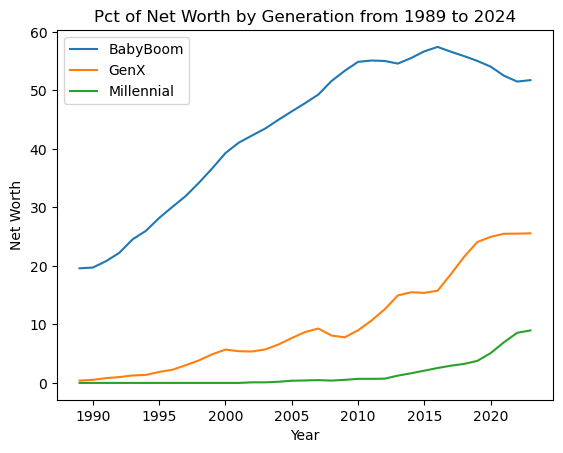

In [10]:
# Create line chart of Pct of net worth by generation from 1989 to 2024

# Define the generations to include
generations = ['BabyBoom', 'GenX', 'Millennial']

# Filter the data to include only the years from 1989 to 2024 and the specified generations
filtered_data = gen_level_details_grouped.loc[(gen_level_details_grouped.index.get_level_values('Year') >= 1989) & 
                                              (gen_level_details_grouped.index.get_level_values('Year') <= 2024) &
                                              (gen_level_details_grouped.index.get_level_values('Category').isin(generations))]

# Filter the data to include only the 'Net worth' category
filtered_data = filtered_data.dropna(subset=['Net worth'])

# Reset index to use 'Year' as x-axis
filtered_data_reset = filtered_data.reset_index()

# Create a line chart for each generation
for generation in generations:
    generation_data = filtered_data_reset[filtered_data_reset['Category'] == generation]
    plt.plot(generation_data['Year'], generation_data['Net worth'], label=generation)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Net Worth')
plt.title('Pct of Net Worth by Generation from 1989 to 2024')
plt.legend()

# Display the plot
plt.show()

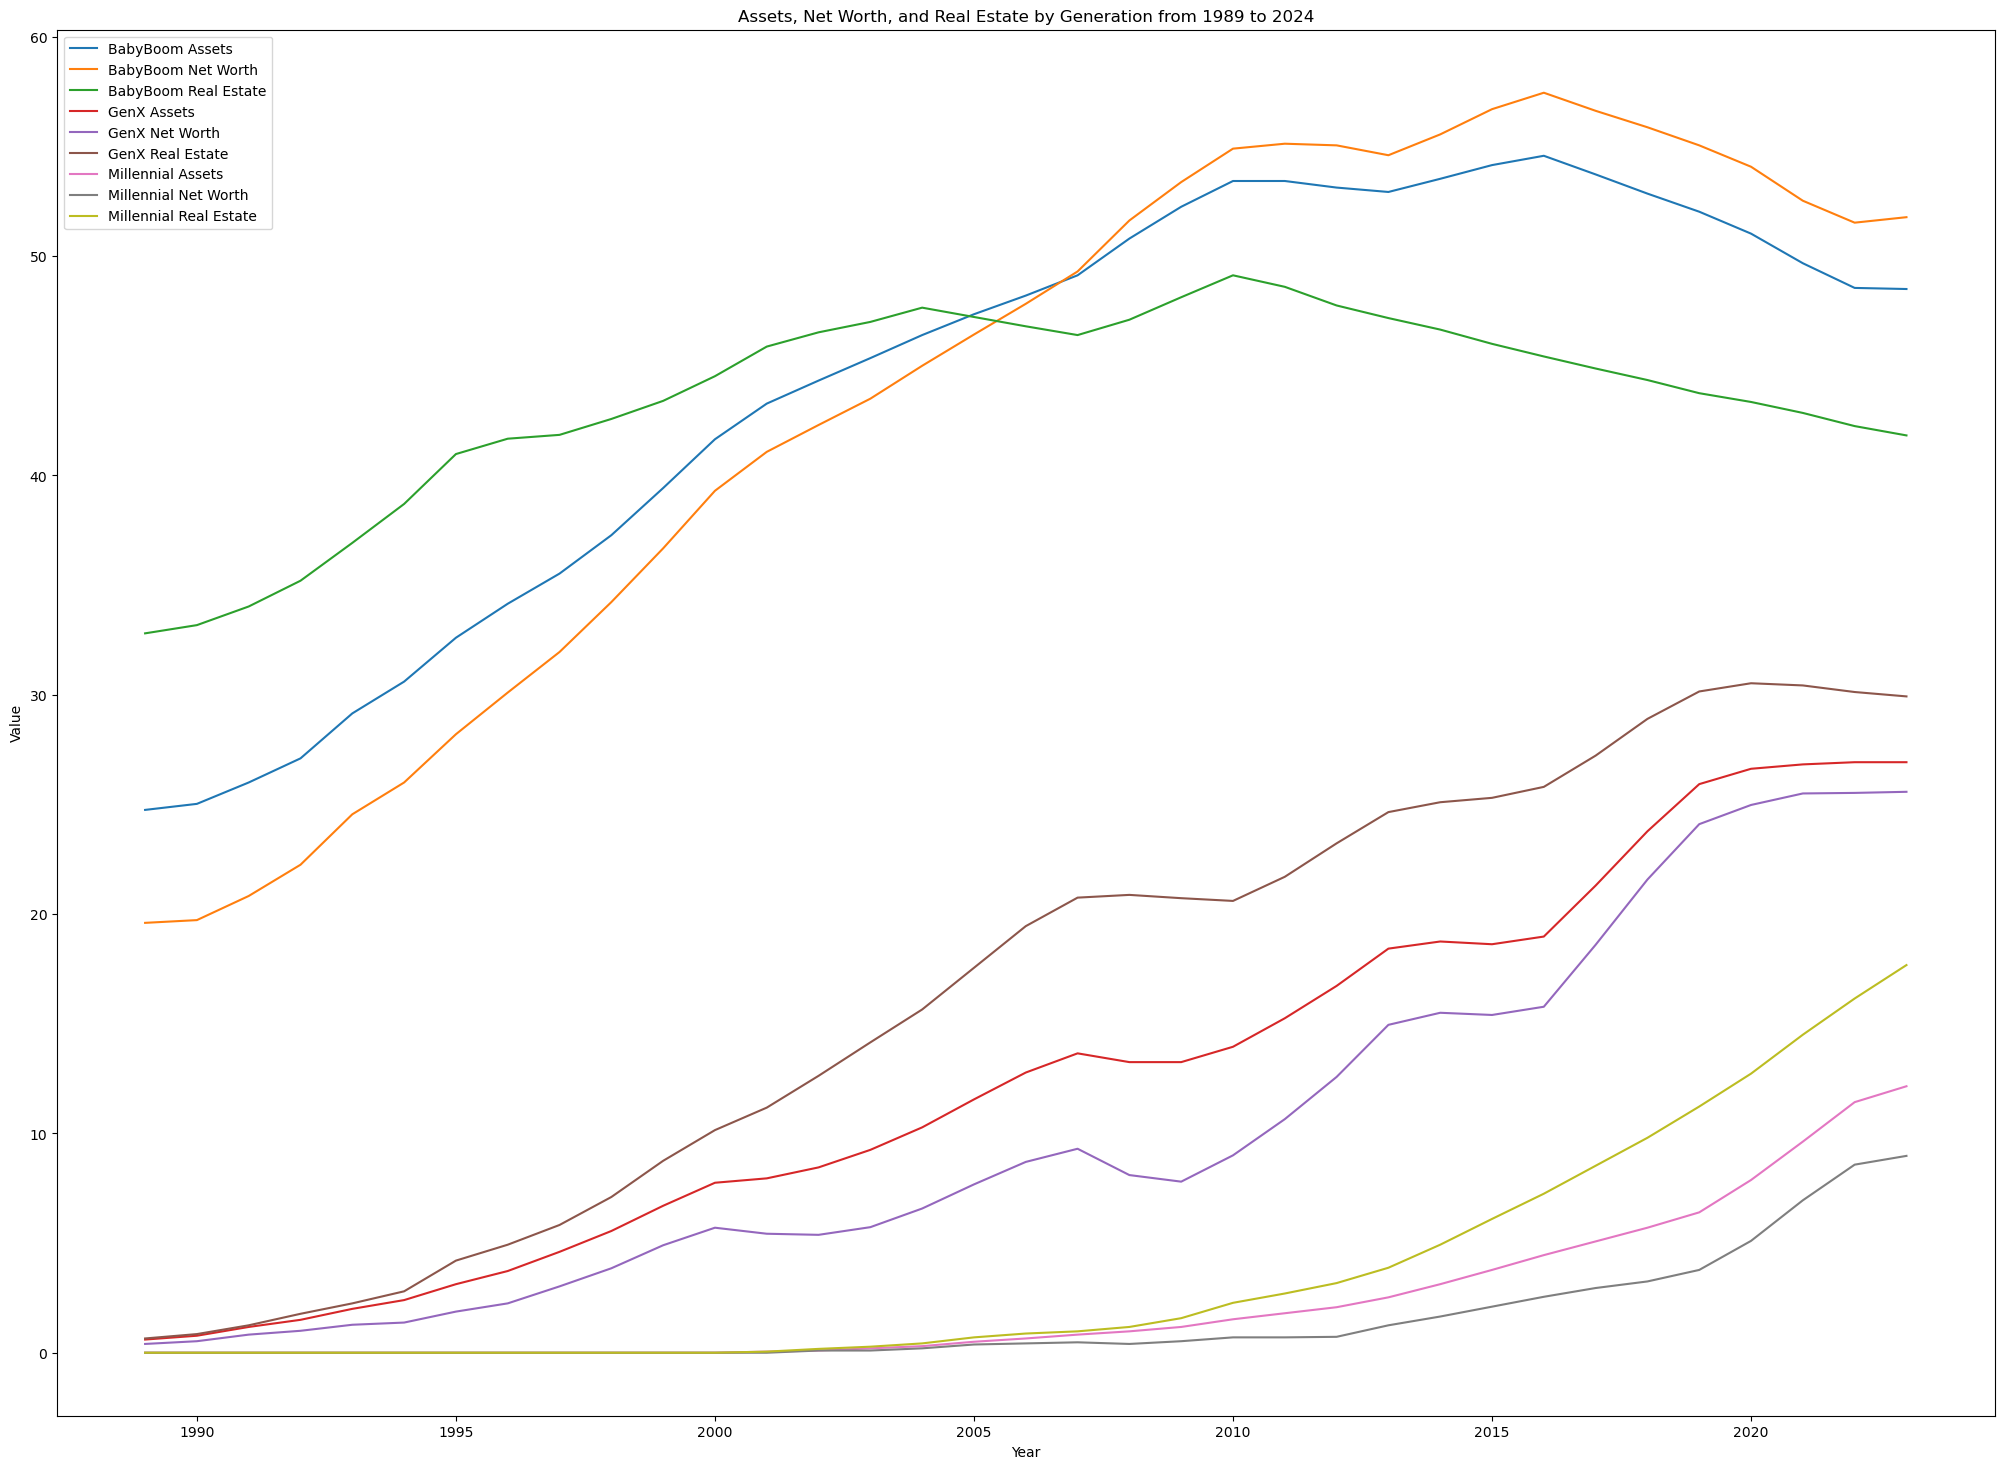

In [11]:
# Create line chart to Plot Assets, Net Worth and Real Estate by Generation

fig, ax = plt.subplots(figsize=(25, 18))

# Define the generations to include
generations = ['BabyBoom', 'GenX', 'Millennial']

# Filter the data to include only the years from 1989 to 2024 and the specified generations
filtered_data = gen_level_details_grouped.loc[(gen_level_details_grouped.index.get_level_values('Year') >= 1989) & 
                                              (gen_level_details_grouped.index.get_level_values('Year') <= 2024) &
                                              (gen_level_details_grouped.index.get_level_values('Category').isin(generations))]

# Reset index to use 'Year' as x-axis
filtered_data_reset = filtered_data.reset_index()

# Create a line chart for each generation and each category
for generation in generations:
    generation_data = filtered_data_reset[filtered_data_reset['Category'] == generation]
    plt.plot(generation_data['Year'], generation_data['Assets'], label=f'{generation} Assets')
    plt.plot(generation_data['Year'], generation_data['Net worth'], label=f'{generation} Net Worth')
    plt.plot(generation_data['Year'], generation_data['Real estate'], label=f'{generation} Real Estate')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Assets, Net Worth, and Real Estate by Generation from 1989 to 2024')
plt.legend()

# Display the plot
plt.show()


